In [1]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math
import sympy as sp
from sympy.solvers import solve
pi = math.pi

#Prints out numbers without "np.flat64" displaying
np.set_printoptions(legacy='1.25')

This program uses the following equation and solves for K1 and K2

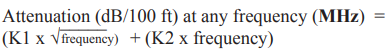

In [2]:
K1,K2,f,A = sp.symbols('K1 K2 f A')


#Based on two matrices of attenuation (db/100 ft) at a frequency (MHz), calculate
#the average K1 value, and the average K2 value.
def find_k1_k2(frequency, attenuation) :
    answers = []

    i=0
    while i<len(frequency) : #Iterate over every unique pair of frequency and attenuation.
        j=1
        while j<len(frequency)-i :
            
            # print(f'eq. 1, f={f[i]} A={A[i]}')
            # print(f'eq. 2, f={i+j} A={A[i]}')

            fx1 = K1*sp.sqrt(frequency[i]) + K2*frequency[i] - attenuation[i]
            fx2 = K1*sp.sqrt(frequency[i+j]) + K2*frequency[i+j] - attenuation[i+j]
            func = [fx1, fx2]
            ans = sp.nsolve(func, (K1, K2), (0.4,0.0001785))
            if (ans[0]>0) & (ans[1]>0) : #ignore negative values because those are non-physical
                answers.append(ans)
            j+=1
        i+=1

    k1 = []
    for a in answers :
        k1.append(a[0])
    k2 = []
    for a in answers :
        k2.append(a[1])

    return [sum(k1)/len(k1), sum(k2)/len(k2)]

LMR-195 Attenuation vs. Frequency

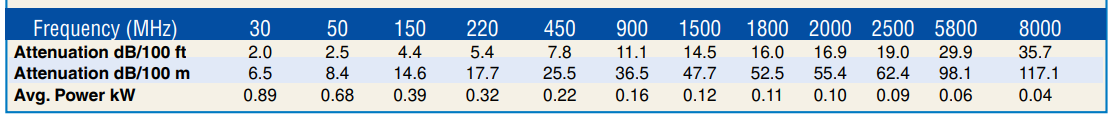

In [84]:
f=[30,50,150,220,450,900,1500,1800,2000,2500,5800,8000]
A=[2,2.5,4.4,5.4,7.8,11.1,14.5,16.0,16.9,19.0,29.9,35.7]
k1k2 = find_k1_k2(f,A)
print('=== LMR-195 K1 and K2 Values ===')
print(f'K1 = {k1k2[0]}, K2 = {k1k2[1]}')

=== LMR-195 K1 and K2 Values ===
K1 = 0.355226555282649, K2 = 0.000538718373913289


047-12SMPSM+ Attenuation vs. Frequency

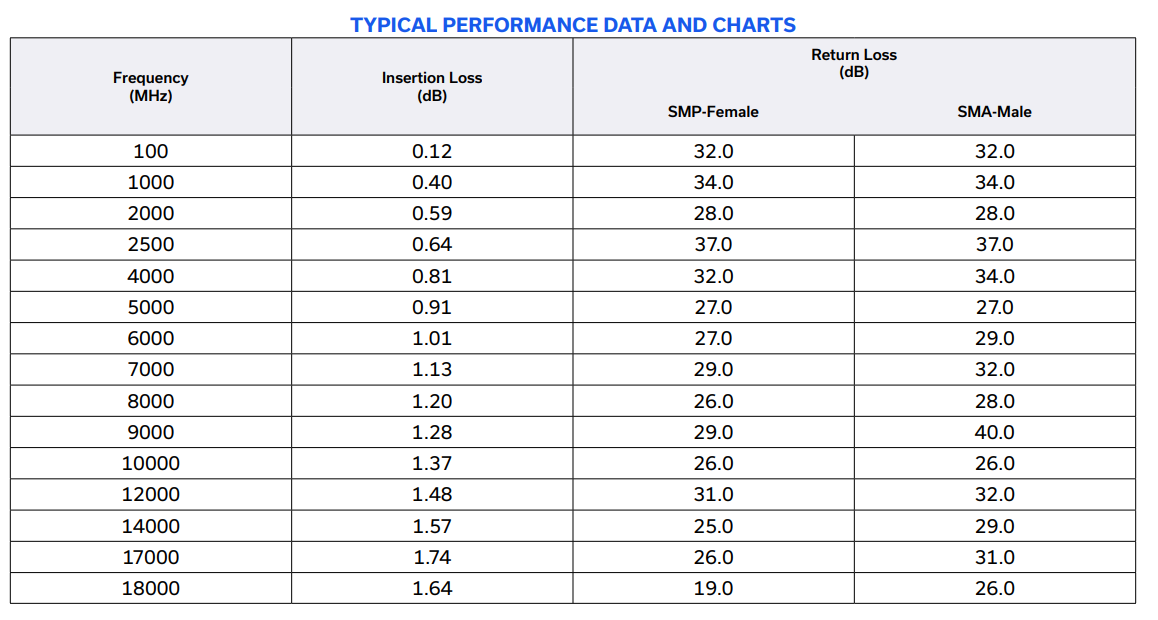

In [8]:
f=[100, 1000, 2000, 2500, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 17000]
A=[0.12, 0.40, 0.59, 0.64, 0.81, 0.91, 1.01, 1.13, 1.20, 1.28, 1.37, 1.48, 1.57, 1.74]
A = [x * (100) for x in A]
k1k2 = find_k1_k2(f,A)
print('=== 047-12SMPSM+ K1 and K2 Values ===')
print(f'K1 = {k1k2[0]}, K2 = {k1k2[1]}')

=== 047-12SMPSM+ K1 and K2 Values ===
K1 = 1.19318009470921, K2 = 0.00159827482645043


TCOM 400

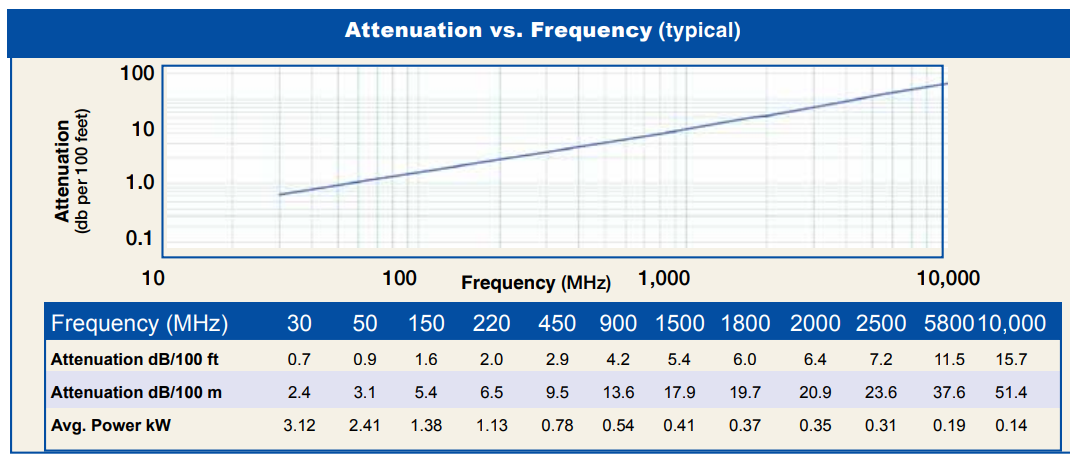

In [10]:
f=[30, 50, 150, 220, 450, 900, 1500, 1800, 2000, 2500, 5800, 10000]
A=[0.7, 0.9, 1.6, 2.0, 2.9, 4.2, 5.4, 6.0, 6.4, 7.2, 11.5, 15.7]
k1k2 = find_k1_k2(f,A)
print('=== TCOM 400 K1 and K2 Values ===')
print(f'K1 = {k1k2[0]}, K2 = {k1k2[1]}')

=== TCOM 400 K1 and K2 Values ===
K1 = 0.127278143131642, K2 = 0.000382554468045722


### Plots of All Cables

In [23]:
# Cable Calculations

def create_attenuation_data(k1,k2,freq_min,freq_max) :
    x_array = np.linspace(freq_min,freq_max,num=100)
    #x_array = [x*10**6 for x in x_array] #convert to Hz
    y_array = [(k1*np.sqrt(x) + k2*x) for x in x_array]
    return [x_array, y_array]

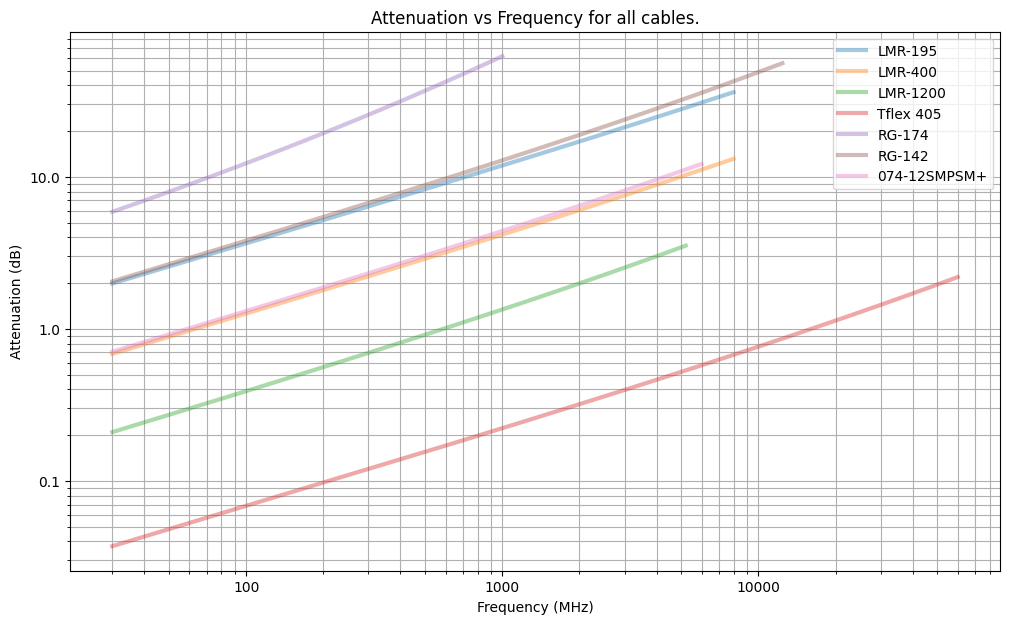

In [49]:
import matplotlib.ticker as mticker

LMR_195 = create_attenuation_data(0.36042759,0.0004747, 30, 8000)
LMR_400 = create_attenuation_data(0.1235129,0.0002626, 30, 8000)
LMR_1200 = create_attenuation_data(0.03737,0.00016, 30, 5200)
TFLEX_405 = create_attenuation_data(0.006746,0.000009, 30, 60000)
RG174 = create_attenuation_data(0.888,0.034, 30, 1000)
RG142 = create_attenuation_data(0.368,0.0012, 30, 12400)
SMPSM = create_attenuation_data(1.1932,0.001598, 30, 18000)
TCOM_400 = create_attenuation_data(0.127278143131642,0.000382554468045722, 30, 6000)

fig = plt.figure(figsize = (12,7))
lw = 3

plt.loglog(LMR_195[0],LMR_195[1], alpha = 0.4, linewidth=lw)
plt.loglog(LMR_400[0],LMR_400[1], alpha = 0.4, linewidth=lw)
plt.loglog(LMR_1200[0],LMR_1200[1], alpha = 0.4, linewidth=lw)
plt.loglog(TFLEX_405[0],TFLEX_405[1], alpha = 0.4, linewidth=lw)
plt.loglog(RG174[0],RG174[1], alpha = 0.4, linewidth=lw)
plt.loglog(RG142[0],RG142[1], alpha = 0.4, linewidth=lw)
plt.loglog(TCOM_400[0],TCOM_400[1], alpha = 0.4, linewidth=lw)
plt.title('Attenuation vs Frequency for all cables.')
plt.legend(['LMR-195','LMR-400','LMR-1200','Tflex 405','RG-174','RG-142','074-12SMPSM+','TCOM-400'])
plt.grid(True, which='both', ls='-')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Attenuation (dB)')

ax = plt.gca() #get axis'
ax.xaxis.set_major_formatter(mticker.ScalarFormatter()) #scalar xaxis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter()) #scalar yaxis

## Eight Element Phased Array

In [7]:
splitter = rf.Network('E:\OneDrive\Documents\VSCodeProjects\SciKit-RF-Learning\JCPS-8-10+___Plus25degC.S9P')
test1 = rf.Network(frequency=splitter.f, s=splitter.s11.s)
f = splitter.f
s = np.zeros((len(f), 2, 2), dtype=complex)
s[:,0,0] = splitter.s99.s[:,0,0] #S11
s[:,0,1] = splitter.s91.s[:,0,0] #S12
s[:,1,0] = splitter.s19.s[:,0,0] #S21
s[:,1,1] = splitter.s11.s[:,0,0] #S22

twoport_network = rf.Network(frequency=f, s=s)
twoport_network.write_touchstone('splitter.s2p')

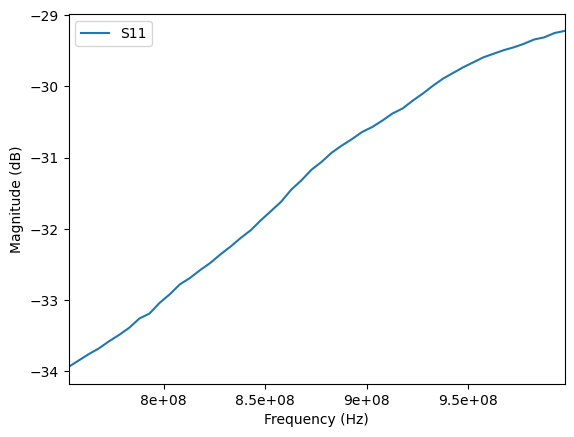

In [97]:
twoport_network[150:200].s22.plot_s_db()

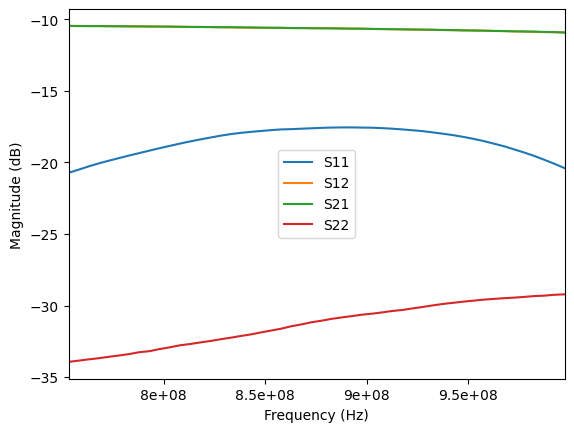

In [87]:
twoport_network[150:200].plot_s_db()

In [104]:
switch = rf.Network('E:\OneDrive\Documents\VSCodeProjects\SciKit-RF-Learning\HSWA2-30DR+_Unit1_Con1_HIGH_Con2_LOW.s3p')
f_switch = switch.f
s_switch = np.zeros((len(f_switch), 2, 2), dtype=complex)
s_switch[:,0,0] = switch.s11.s[:,0,0] #S11
s_switch[:,0,1] = switch.s12.s[:,0,0] #S12
s_switch[:,1,0] = switch.s21.s[:,0,0] #S21
s_switch[:,1,1] = switch.s22.s[:,0,0] #S22

switch_twoport = rf.Network(frequency=f_switch, s=s_switch)
switch_twoport.write_touchstone('switch.s2p')



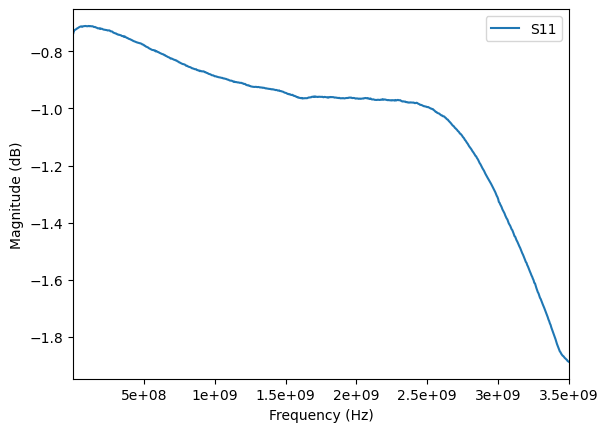

In [101]:
switch_twoport.s12.plot_s_db()

In [5]:
TX_amp = rf.Network('E:\OneDrive\Documents\VSCodeProjects\SciKit-RF-Learning\HXG-122+_S-PAR_5V_25C_Unit1.s2p')
TX_amp_f = TX_amp.f
TX_amp_s = np.zeros((len(TX_amp_f), 2, 2), dtype=complex)
TX_amp_s[:,0,0] = TX_amp.s11.s[:,0,0] #S11
TX_amp_s[:,0,1] = TX_amp.s12.s[:,0,0] #S12
TX_amp_s[:,1,0] = TX_amp.s21.s[:,0,0] #S21
TX_amp_s[:,1,1] = TX_amp.s22.s[:,0,0] #S22

TX_amp_twoport = rf.Network(frequency=TX_amp_f, s=TX_amp_s)
TX_amp_twoport.write_touchstone('TX_amp.s2p')


In [8]:
RX_splitter_f = splitter.f
RX_splitter_s = np.zeros((len(f), 2, 2), dtype=complex)
RX_splitter_s[:,0,0] = splitter.s11.s[:,0,0] #S11
RX_splitter_s[:,0,1] = splitter.s19.s[:,0,0] #S12
RX_splitter_s[:,1,0] = splitter.s91.s[:,0,0] #S21
RX_splitter_s[:,1,1] = splitter.s99.s[:,0,0] #S22

RX_splitter_twoport = rf.Network(frequency=RX_splitter_f, s=RX_splitter_s)
RX_splitter_twoport.write_touchstone('RX_splitter.s2p')

In [10]:
RX_switch = rf.Network('E:\OneDrive\Documents\VSCodeProjects\SciKit-RF-Learning\HSWA2-30DR+_Unit1_Con1_LOW_Con2_HIGH.s3p') # port1 will be old port3, port 2 will be old port1
RX_f_switch = RX_switch.f
RX_s_switch = np.zeros((len(RX_f_switch), 2, 2), dtype=complex)
RX_s_switch[:,0,0] = RX_switch.s33.s[:,0,0] #S11
RX_s_switch[:,0,1] = RX_switch.s31.s[:,0,0] #S12
RX_s_switch[:,1,0] = RX_switch.s13.s[:,0,0] #S21
RX_s_switch[:,1,1] = RX_switch.s11.s[:,0,0] #S22

RX_switch_twoport = rf.Network(frequency=RX_f_switch, s=RX_s_switch)
RX_switch_twoport.write_touchstone('RX_switch.s2p')